n=6: Flujo de calor Q=-100.000000 W


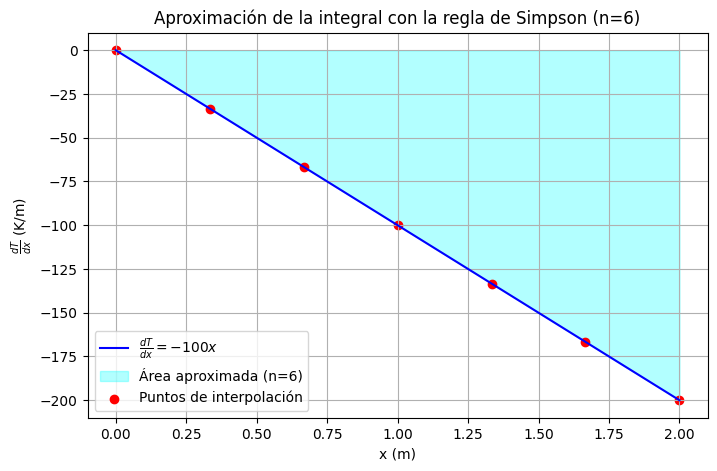

n=10: Flujo de calor Q=-100.000000 W


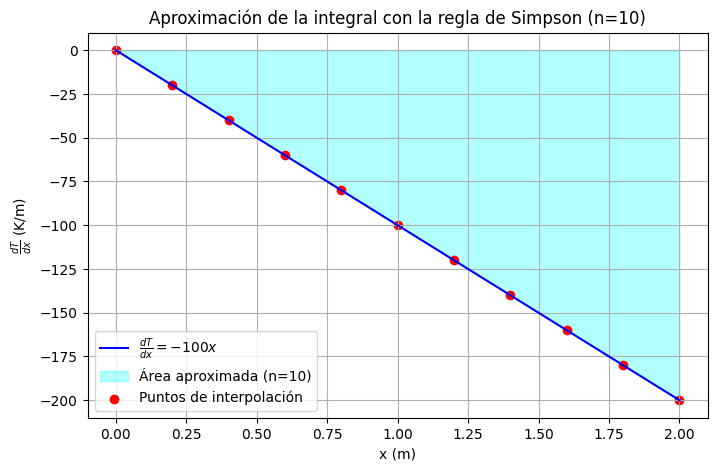

n=20: Flujo de calor Q=-100.000000 W


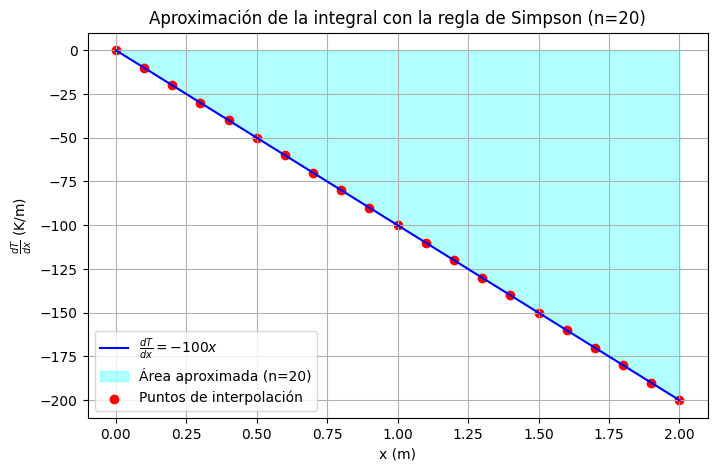

n=30: Flujo de calor Q=-100.000000 W


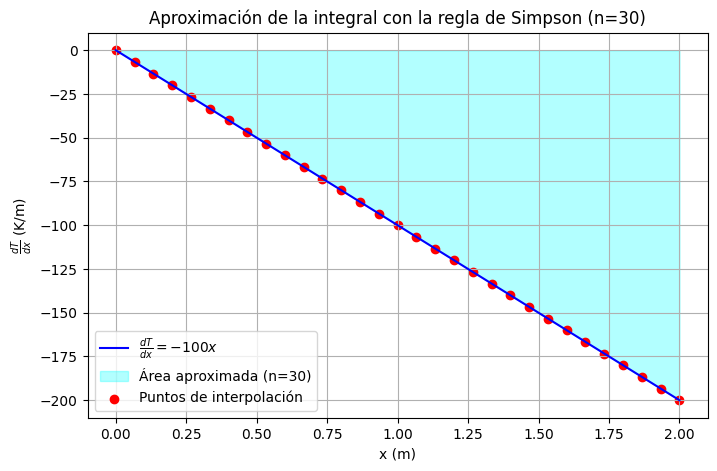

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simpson_rule(f, a, b, n):
    """Aproxima la integral de f(x) en [a, b] usando la regla de Simpson."""
    if n % 2 == 1:
        raise ValueError("El número de subintervalos (n) debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)  # Puntos del intervalo
    fx = f(x)  # Evaluamos la función en esos puntos

    # Aplicamos la regla de Simpson
    integral = (h / 3) * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])
    return integral

# Derivada de la función de temperatura dT/dx
def dT_dx(x):
    return -100 * x  # Derivada de T(x) = 300 - 50x^2

# Parámetros del problema
k = 0.5  # Conductividad térmica en W/m·K
x1, x2 = 0, 2  # Intervalo [x1, x2]

# Bucle para calcular la integral y graficar para diferentes valores de n
for n in [6, 10, 20, 30]:
    # Cálculo del flujo de calor
    Q = k * simpson_rule(dT_dx, x1, x2, n)
    print(f"n={n}: Flujo de calor Q={Q:.6f} W")

    # Visualización gráfica del flujo de calor
    x_vals = np.linspace(x1, x2, 100)  # Valores para la curva
    dT_vals = dT_dx(x_vals)  # Derivada de la temperatura

    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, dT_vals, label=r"$\frac{dT}{dx} = -100x$", color="blue")
    plt.fill_between(x_vals, dT_vals, alpha=0.3, color="cyan", label=f"Área aproximada (n={n})")
    plt.scatter(np.linspace(x1, x2, n + 1), dT_dx(np.linspace(x1, x2, n + 1)), color="red", label="Puntos de interpolación")
    plt.xlabel("x (m)")
    plt.ylabel(r"$\frac{dT}{dx}$ (K/m)")
    plt.title(f"Aproximación de la integral con la regla de Simpson (n={n})")
    plt.legend()
    plt.grid()

    # Guardar la figura
    plt.savefig(f"flujo_calor_n{n}.png")
    plt.show()